# Исследование объявлений о продаже квартир

Необходимо исследовать данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

План:
1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков.
2. Изучите время продажи квартиры. Выяснить, сколько обычно занимает продажа, когда можно считать, что продажи прошли очень быстро, а когда необычно долго.
3. Выявить факторы, которые больше всего влияют на стоимость квартиры. Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
4. Найти 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. 
5. Выделить квартиры в Санкт-Петербурге и выяснить, какая область входит в центр. 
6. Выделите сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
7. Сделать выводы. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
#проверим названия столбцов
realty.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

В предоставленном файле 23699 операций с недвижимостью, 22 столбца с признаками. В большинстве столбцов есть пустые значения, при этом есть столбцы, в которых пустых значений больше половины.   
Вероятнее всего в столбцах с пропусками данные не обязательны дня заполнения. Какие-то пользователи их указывают, какие-то нет. Как правило, не указывают те данные, которые по мнению пользователя, не важны для принятия решения о покупке или не влияют на стоимость квартиры. В данных, которые заполняются автоматически, также есть пропуски (расстояние до центра, аэропорта, ближайшего парка и водоёма). Возможная причина: технический сбой и данные не подтянулись. Или другая возможная причина: данные отсутствуют в тех населенных пунктах, где нет аэропорта, водоема или парка.  
В некоторых столбцах нужно заменить тип данных.

### Шаг 2. Предобработка данных

In [6]:
realty['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [7]:
#заменим пропуски на 0, что соответствует false
realty['is_apartment'] = realty['is_apartment'].fillna(0)

In [8]:
#изменим тип данных на bool
realty['is_apartment'].astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

In [9]:
realty['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [10]:
#заменим пустые значения на 0
realty['balcony'] = realty['balcony'].fillna(0)

In [11]:
#сменим тип данных на целочисленный
realty = realty.astype({'last_price': int, 'balcony': int})

In [12]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

In [13]:
realty.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [14]:
realty['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

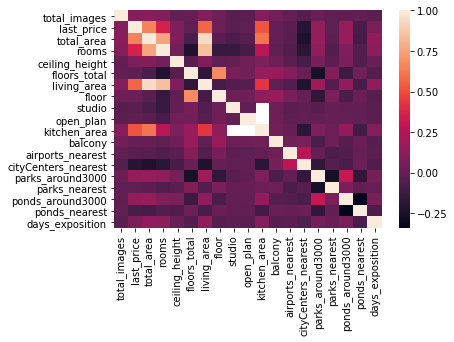

In [15]:
#посмотрим, есть ли зависимость высоты потолка от других параметров
sns.heatmap(realty.corr())

Модальное распределение высоты потолков 2.5 метра. Явной корреляционной зависимости от других параметров нет.  
Посмотрим, как изменяется высота потолка в зависимости от количества этажей в доме.

In [16]:
realty.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['count', 'median', 'mean', 'max', 'min'])

,count,median,mean,max,min
,ceiling_height,ceiling_height,ceiling_height,ceiling_height,ceiling_height
floors_total,,,,,
1.0,10,2.80,2.740000,3.00,2.30
2.0,215,2.70,3.006791,27.00,1.20
3.0,399,2.80,2.969474,32.00,2.50
4.0,789,3.00,2.986831,27.00,2.40
5.0,3666,2.55,2.793191,100.00,2.00
6.0,619,3.00,3.120743,32.00,2.40
7.0,398,3.00,2.946960,6.00,2.45
8.0,220,2.80,2.856818,5.20,2.40


In [17]:
#значения выше 20 вероятно указаны в дециметрах. Заменим их на метры путем деления на 10
realty.loc[realty['ceiling_height'] >= 20, 'ceiling_height'] = realty['ceiling_height']/10

Мы видим, что в данных есть выбросы, которые влияют на среднее значение. Медиана почти везде равна 2.7 или более. Модальное распределение 2.5. По СанПину высота потолков в многоэтажке в Санкт-Петербурге должна быть не меньше 2.5. Данных для того, чтобы восстановить пропуски, у нас недостаточно. 
Есть мысль, что высота потолка могла бы зависеть от года постройки дома. Например, в "сталинках" высота потолка выше, чем в "хрущевках". Если такие данные возможно получить, то можно запросить такую выгрузку.  
На основании  имеющихся данных пустые значения заполнять не будем, чтобы не исказить результаты. 

In [18]:
#Столбец с датой переведем из строки в дату
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,0,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,0,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,0,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,0,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,0,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,0,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [20]:
#посмотрим как коррелирует параметры между собой. 
realty.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,0.044972,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.347524,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.008559,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.416165,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.253054,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,0.044972,0.347524,0.416165,0.253054,1.000000,-0.081008,0.392856,-0.039030,0.016168,0.009898,0.370913,-0.058932,-0.093424,-0.318449,0.235948,-0.054630,0.207672,-0.131674,0.112513
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.081008,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.392856,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.039030,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.016168,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.009898,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.032639,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


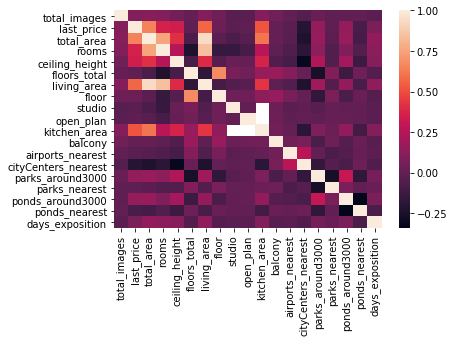

In [21]:
sns.heatmap(realty.corr())

Очень высокая корреляция между жилой площадью и общей, значение корреляции 0,94. Между площадью кухни и общей площадью средняя корреляция, значение равно 0,6. Для заполнения пропусков нам потребуется соотношение жилой и общей площадей, а также отношение площади кухни к общей площади.Поэтому пропуски заполним в следующем шаге.

### Вывод

"is_apartment" заполнено всего 2775 значений. Т.к. здесь всего два варианта значений, предполагаю, что пустые данные там, где рассматриваемвая недвижимость не является апартаментами, иначе пользователи бы заполнили эти данные. Поэтому пропущенные значения в этой графе заменили на 0, что соответствует False. После того, как все данные в графе заполнили, сменили тип данных на bool.

Аналогично поступаем во столбцом, где указано количество балконов. Все отсутствующие данные заполняем 0, т.к. предполагаем, что пользователи не указали количество балконов, потому что их нет. Тип данных заменяем на целочисленный.

В 39% данных отсутствует информация о высоте потолка. Аналогично предыдущим выводам высота потолка не указана скорей всего потому, что она стандартная и для продавца квартиры роли не играет и на цену не влияет, иначе бы владелец недвижимости указал данные. Мода по распределению высоты потолков = 2.5 метра. Кроме того, высоту потолков в многоквартирных домах стандартной застройки регламентирует п. 5.8 СНиП 31-01-2003. Согласно данному документу в климатическом районе, к которому относится Санкт-Петербург, минимальная высота потолка равна 2.5 метра. Поэтому застройщики многоквартирных домов в домах "эконом"-класса используют именно эту высоту. Высота потолка не коррелирует с другими данными. В сводной таблице высоты потолка от этажности дома мы видим, что медиана почти везде равна 2.7 или более. Согласно классификации, разработанной Фондом РЖС, высота потолков в комфортклассе начинается от 2,7 м, в бизнес–классе — от 2,75 м. 

Данных для того, чтобы однозначно восстановить пропуски, у нас недостаточно. Есть мысль, что высота потолка могла бы зависеть от года постройки дома. В дореволюционных жилых домах (1890–1930 гг.), в "сталинках" (1930–1950 гг.) высота потолков была  3,2–5 м. А в домах постройки 1950–1980 гг., так называемых хрущевках, средняя высота потолков не превышает 2,4–2,5 м. В новостройках высота потолка варьируется от 2,6 до 3,0 метров.

Если такие данные возможно получить, то можно запросить выгрузку года строитльства дома.
На основании имеющихся данных пустые значения заполнять не будем, чтобы не исказить результаты.

Очень высокая корреляция между жилой площадью и общей, значение корреляции 0,94. Между площадью кухни и общей площадью средняя корреляция, значение равно 0,6. Для заполнения пропусков нам потребуется соотношение жилой и общей площадей, а также отношение площади кухни к общей площади. Поэтому пропуски в столбцах площади кухни и жилой площади заполним в следующем шаге. 


Для других типов данных нет подходящего значения на замену. Поэтому оставим эти значения пустыми. Причина пропусков: пользователи не указали данные, т.к поля не обязательны для . Вероятнее всего для пользователя эти данные не играют роли и на цену недвижимости не влияют. 

В столбце с датой заменили строчный тип на дату, чтобы в дальнейшем было проще работать с этими значениями.

### Шаг 3. Посчитайте и добавьте в таблицу

In [22]:
#добавим колонку с ценой за 1 кв.метр, укажем целое число
realty['price_meter'] = (realty['last_price'] / realty['total_area']).astype('int')

In [23]:
#добавим колонку с месяцем публикации
realty['month'] = pd.DatetimeIndex(realty['first_day_exposition']).month

In [24]:
#добавим колонку с годом публикации
realty['year'] = pd.DatetimeIndex(realty['first_day_exposition']).year

In [25]:
#добавим колонку с днями  недели, когда была сделана публикация
realty['weekday'] = realty['first_day_exposition'].dt.weekday_name

In [26]:
#добавим соотношение жилой площади к общей
realty['living_total_ratio'] = (realty['living_area'] / realty['total_area'])

In [27]:
#добавим отношение площади кухни к общей площади
realty['kitchen_total_ratio'] = (realty['kitchen_area'] / realty['total_area'])

In [28]:
#напишем функцию для определения категории этажа
def realty_floors(row):
    if row[8] == row[6]:
        return 'Последний'
    elif row[8] == 1:
        return'Первый'
    else:
        return 'Другой'

In [29]:
realty['name_floor'] = realty.apply(realty_floors, axis=1)

In [30]:
realty.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor
17322,9,8700000,57.00,2017-10-26,2,3.20,6.0,32.0,4,0,...,3.0,289.0,16.0,152631,10,2017,Thursday,0.561404,0.140351,Другой
19473,8,16200000,106.00,2017-07-10,3,2.50,5.0,83.0,2,0,...,0.0,NaN,383.0,152830,7,2017,Monday,0.783019,0.141509,Другой
18129,20,5050000,75.65,2018-02-12,3,NaN,18.0,43.3,16,0,...,NaN,NaN,141.0,66754,2,2018,Monday,0.572373,0.155981,Другой
13565,16,1700000,51.50,2018-03-03,2,2.50,5.0,28.0,2,0,...,NaN,NaN,NaN,33009,3,2018,Saturday,0.543689,0.139806,Другой
20121,1,9600000,85.40,2018-02-06,2,NaN,10.0,40.2,4,0,...,1.0,223.0,60.0,112412,2,2018,Tuesday,0.470726,0.270492,Другой
19177,0,3450000,43.00,2018-06-25,1,NaN,15.0,NaN,15,0,...,NaN,NaN,45.0,80232,6,2018,Monday,NaN,NaN,Последний
213,11,8700000,111.40,2016-10-10,4,3.10,4.0,73.2,2,0,...,3.0,55.0,791.0,78096,10,2016,Monday,0.657092,0.126571,Другой
22020,8,7100000,75.00,2019-02-22,3,2.65,12.0,45.2,6,False,...,0.0,NaN,64.0,94666,2,2019,Friday,0.602667,0.106667,Другой
5727,7,1950000,33.00,2018-01-18,1,2.50,5.0,19.4,2,0,...,NaN,NaN,137.0,59090,1,2018,Thursday,0.587879,0.181818,Другой
18856,7,7650000,56.00,2018-08-31,2,2.60,13.0,32.0,10,0,...,1.0,354.0,202.0,136607,8,2018,Friday,0.571429,0.196429,Другой


In [31]:
#посчитаем медианное значение в соотношении жилой и общей площадей
median_ratio = realty['living_total_ratio'].median()

In [32]:
#заполним пропуски в жилой площади как произведение общей площади на коэффициент median_ratio
realty['living_area'] = realty['living_area'].fillna(value=median_ratio*realty['total_area'])

In [33]:
#аналогично посчитаем медианное значение в отношении площади кухни к общей площади
median_ratio_k = realty['kitchen_total_ratio'].median()

In [34]:
#заполним пропуски в площади кухни
realty['kitchen_area'] = realty['kitchen_area'].fillna(value=median_ratio_k*realty['total_area'])

In [35]:
#запишем данные в таблицу, округлив до 2-х знаков после запятой
realty['kitchen_total_ratio'] = (realty['kitchen_area'] / realty['total_area']).map(lambda x:'{:.2f}'.format(x))

In [36]:
realty['living_total_ratio'] = (realty['living_area'] / realty['total_area']).map(lambda x:'{:.2f}'.format(x))

In [37]:
realty.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor
6279,10,5550000,67.0,2016-08-02,3,NaN,5.0,54.0,2,0,...,0.0,NaN,798.0,82835,8,2016,Tuesday,0.81,0.10,Другой
6748,0,7990000,56.9,2017-10-04,2,NaN,5.0,35.6,5,0,...,1.0,490.0,171.0,140421,10,2017,Wednesday,0.63,0.14,Последний
18408,14,13289860,114.0,2019-01-29,3,3.14,7.0,80.0,2,0,...,1.0,531.0,54.0,116577,1,2019,Tuesday,0.70,0.11,Другой
17183,6,3990000,43.0,2017-10-26,1,NaN,17.0,18.0,6,0,...,2.0,281.0,12.0,92790,10,2017,Thursday,0.42,0.26,Другой
963,18,8625000,53.1,2018-09-12,2,2.73,10.0,29.7,3,0,...,2.0,372.0,88.0,162429,9,2018,Wednesday,0.56,0.18,Другой
18510,10,4150000,39.0,2018-04-03,1,NaN,16.0,16.0,5,0,...,0.0,NaN,209.0,106410,4,2018,Tuesday,0.41,0.32,Другой
12053,0,3600000,46.0,2017-12-07,2,2.60,9.0,27.5,1,0,...,0.0,NaN,56.0,78260,12,2017,Thursday,0.60,0.14,Первый
3506,14,3695000,42.0,2018-06-25,1,NaN,25.0,18.2,17,0,...,NaN,NaN,161.0,87976,6,2018,Monday,0.43,0.25,Другой
20165,1,4350000,43.8,2019-04-04,2,2.50,5.0,29.0,5,0,...,0.0,NaN,9.0,99315,4,2019,Thursday,0.66,0.13,Последний
3467,12,10000000,111.0,2017-11-10,5,NaN,5.0,87.0,3,0,...,2.0,838.0,21.0,90090,11,2017,Friday,0.78,0.06,Другой


In [38]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

Добавили  к таблице колонку с ценой за 1 кв.метр. Также добавили колонки с днем недели, месяцем и годом публикации объявления.
Создали колонку с категорией этажа: первый, последний, другой.
Указали соотношение жилой и общей площади, а также отношение площади кухни к общей. Посчитали медианное значение у этих параметров  и вычислили площадь кухни и общую площадь в завсисмости от общей. Заполнили пропуски посчитанными значениями.

### Шаг 4. Проведем исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [39]:
#создадим датафрейм по интересующим нас колонкам
realty_2 = realty.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition', 'price_meter']]

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


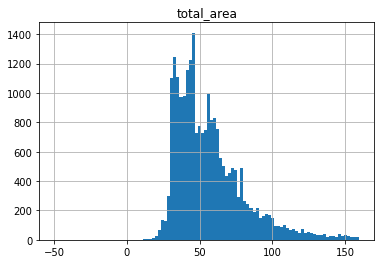

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


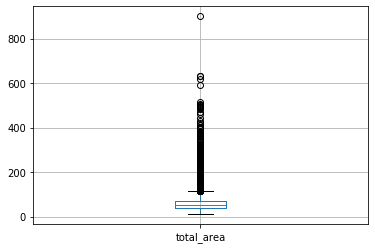

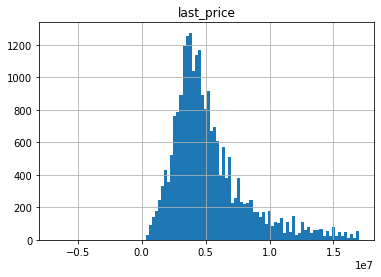

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


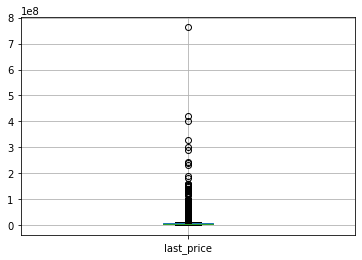

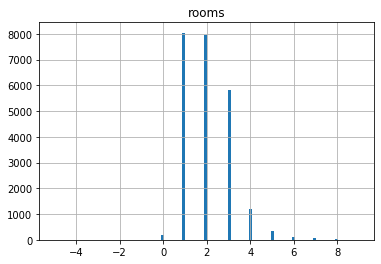

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64


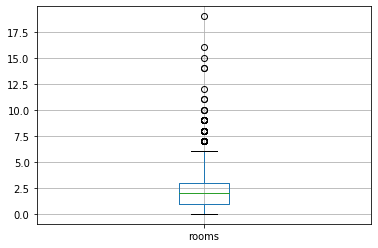

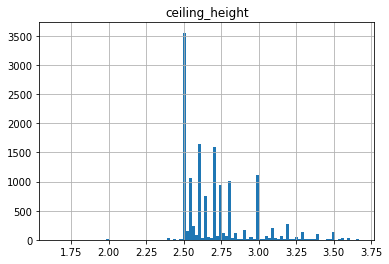

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


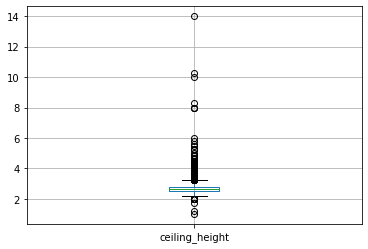

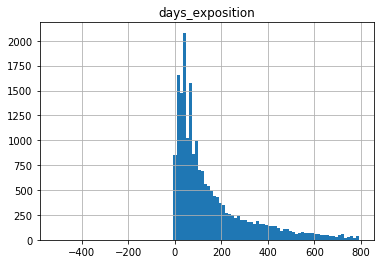

count    2.369900e+04
mean     9.942121e+04
std      5.030681e+04
min      1.110000e+02
25%      7.658500e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: price_meter, dtype: float64


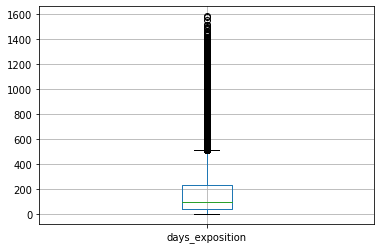

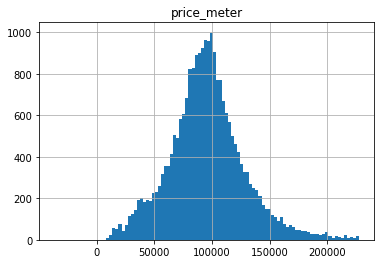

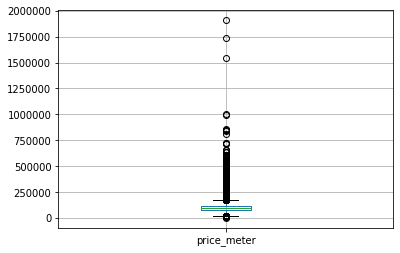

In [40]:
# с помощью цикла выведем описание данных, гистограмму и "ящик с усами"
for column in realty_2:
    q1 = realty_2[column].quantile(.25)
    q3 = realty_2[column].quantile(.75)
    iqr = q3 - q1
    print(realty_2[column].describe())
    realty_2.hist(column, bins=100, range=((q1-3*iqr), (q3+3*iqr)))
    plt.show()
    realty.boxplot(column)

_Общая площадь_ 

Больше всего недвижимости площадью около 40 кв.м. После 125 кв.м - объектов мало, но тем не менее они встречается, совсем редкие значения после 400 кв.м, считаем их выбросами. Также есть единичные объекты общей площадью до 20 кв.м. Медиана равна 52 кв.метра

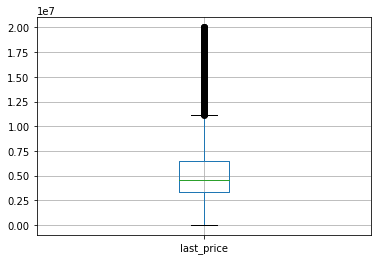

In [41]:
#рассмотрим поближе "ящик с усами" по 'last_price' , из-за огромных выбросов масштаб получился слишком мелким
realty.query('last_price < 20000000').boxplot(column = 'last_price')

In [42]:
#по ящику с усами выбросами считается все, что выше 11 млн, но таких значений очень много
realty[realty['last_price'] > 11000000]['last_price'].count()

2284

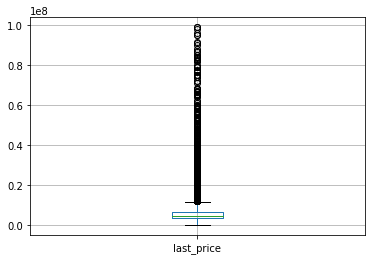

In [43]:
#посмотрим, где значения идут не так плотно
realty.query('last_price < 100000000').boxplot(column = 'last_price')

In [44]:
realty[realty['last_price'] > 50000000]['last_price'].count()

131

Видим, что квартир стоимостью более 11 млн довольно много, а вот от 50 млн - уже редкие значения. Поэтому рассматривать будем квартиры стоимостью до 50 млн.

In [45]:
#рассмотрим, что за недвижисомть стоит меньше 500 тыс
realty.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor
5698,7,450000,42.0,2017-07-31,2,NaN,1.0,23.000000,1,0,...,NaN,NaN,233.0,10714,7,2017,Monday,0.55,0.14,Последний
6859,6,490000,40.0,2017-12-11,1,NaN,5.0,22.714396,3,0,...,NaN,NaN,43.0,12250,12,2017,Monday,0.57,0.17,Другой
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.000000,25,0,...,0.0,NaN,8.0,111,3,2019,Wednesday,0.29,0.37,Последний
9581,7,450000,43.4,2018-08-31,2,NaN,5.0,30.300000,3,0,...,NaN,NaN,96.0,10368,8,2018,Friday,0.70,0.13,Другой
10782,3,490000,29.1,2016-05-05,1,2.50,5.0,17.000000,5,0,...,NaN,NaN,719.0,16838,5,2016,Thursday,0.58,0.19,Последний
14911,5,430000,54.0,2018-06-26,2,NaN,3.0,30.664435,3,0,...,NaN,NaN,44.0,7962,6,2018,Tuesday,0.57,0.17,Последний
16032,8,480000,32.0,2019-01-06,1,NaN,2.0,16.000000,1,0,...,NaN,NaN,83.0,15000,1,2019,Sunday,0.50,0.17,Первый
16219,14,450000,38.5,2018-07-11,2,2.65,2.0,21.862606,1,0,...,NaN,NaN,45.0,11688,7,2018,Wednesday,0.57,0.17,Первый
16274,18,440000,40.0,2018-07-10,1,NaN,5.0,22.714396,1,0,...,NaN,NaN,45.0,11000,7,2018,Tuesday,0.57,0.17,Первый
17456,7,430000,30.4,2019-04-22,1,NaN,2.0,16.000000,1,0,...,NaN,NaN,NaN,14144,4,2019,Monday,0.53,0.20,Первый


In [46]:
realty[realty['last_price'] < 500000]['locality_name']

5698     городской посёлок Будогощь
6859             деревня Старополье
8793                Санкт-Петербург
9581             деревня Старополье
10782                        Сланцы
14911         посёлок станции Свирь
16032                        Сланцы
16219          деревня Вахнова Кара
16274            деревня Старополье
17456                        Сланцы
17676             деревня Ям-Тесово
18867              деревня Выскатка
21912             поселок Совхозный
23484                        Сланцы
Name: locality_name, dtype: object

##### _Цена продажи_

Цену на момент снятия объявления за неимением других данных будем считать ценой продажи. 
Больше всего продали квартир стоимостью 3-4 млн.
Все , что выше 50 млн можно считать выбросами. И в дальнейшем не рассматривать.
Есть некорректное значение - 12 тыс руб, данный объект не будем рассматривать, далее стоимость недвижимости от 400 тыс руб - в деревнях и поселках. Поэтому выбросами эти данные не считаем. 

_Число комнат_

Чаще всего продают однокомнатные и двухкомнатные квартиры. 0 комнат - это квартира студия. Выше 7 комнат считаем выбросами.

_Высота потолка_

В основном высота потолков составляет 2.5 - 2.7 метра, что соответствует СанПину для многоэтажных домов. Также довольно много квартир с высотой потолка 3.0 метра

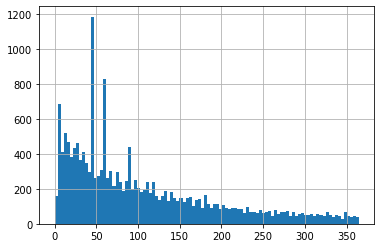

In [47]:
#Посмотрим на диаграмму 'days_exposition' поближе, позьмем временной промежуток, равный 1 году
realty['days_exposition'].hist(bins=100, range=(0, 365))

_Время продажи_

Среднее время продажи 180 дней,медиана же показывает 95 дней. Причина - выбросы, от которых мы в дальнейшем избавимся. Половина сделок закрывается за 3 месяца, 75% сделок - за 8 месяцев. Поэтому все , что дольше 8 месяцев можно назвать довольно долгой продажей. 25% сделок закрывается за 45 дней, поэтому все, что быстрее этого срока отнесем к быстрой продаже.  Все , что выше 500 дней согласно графику можно отнести к выбросам. Но таких сделки не единичны. Поэтому уберем только единичные выбросы по графику "ящик с усами". К ним можно отнести продажи дольше 1300 дней, это примерно 3.5 года. Вероятнее всего, цена на эти объекты недвижимости завышена.

Есть большие пики на графике через 45 дней, 60 и 90 дней с момента публикации объявления. Вероятнее всего, это срок бесплатной публикации в сервисе, после чего пользователи не стали продлять сервис. 

_Стоимость 1 кв.метра_

Наиболее часто продают недвижимость  стоимостью 100 тыс.руб за кв.метр. Все, что выше 200 тыс можно было бы отнести к выбросам. но таких значений довольно много. Отбросим только самые редкие значения. Сюда отнесем все, что выше 500 тыс.

Таким образом, типичная наиболее часто продаваемая квартира выглядит следующим образом:
Это 1-2 комнатная квартира, стоимостью 3-4 млн руб, площадью около 40 кв.метров , с высотой потолка 2.5 метра. Время продажи примерно 3 месяца. 

Избавимся от единичных выбросов и создадим новую таблицу.  
Условия:
- общая площадь не более 400 кв.меторв
- Число комнат меньше 8  
- Цена за квадратный метр не больше 500 тыс  
- Цена продажи от 400 тыс до 50 млн  
- количество дней - от 1 до 1300

In [48]:
new = realty.query('(total_area <= 400) and (1 < days_exposition <= 1300) and (rooms < 8) and (price_meter <= 500000) and (400000 < last_price < 50000000)').reset_index(drop=True)

In [49]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20329 entries, 0 to 20328
Data columns (total 29 columns):
total_images            20329 non-null int64
last_price              20329 non-null int64
total_area              20329 non-null float64
first_day_exposition    20329 non-null datetime64[ns]
rooms                   20329 non-null int64
ceiling_height          11923 non-null float64
floors_total            20252 non-null float64
living_area             20329 non-null float64
floor                   20329 non-null int64
is_apartment            20329 non-null object
studio                  20329 non-null bool
open_plan               20329 non-null bool
kitchen_area            20329 non-null float64
balcony                 20329 non-null int64
locality_name           20281 non-null object
airports_nearest        15664 non-null float64
cityCenters_nearest     15684 non-null float64
parks_around3000        15684 non-null float64
parks_nearest           6797 non-null float64
ponds_arou

Выберем 10 населённых пунктов с наибольшим числом объявлений. 
Посчитаем среднюю цену квадратного метра в этих населённых пунктах.
Выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [50]:
new['locality_name'].value_counts().head(10)

Санкт-Петербург      13465
посёлок Мурино         517
посёлок Шушары         408
Всеволожск             337
Колпино                307
Пушкин                 304
посёлок Парголово      301
деревня Кудрово        299
Гатчина                268
Выборг                 208
Name: locality_name, dtype: int64

In [51]:
city = new['locality_name'].value_counts().head(10).index

In [52]:
city

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Колпино', 'Пушкин', 'посёлок Парголово', 'деревня Кудрово', 'Гатчина',
       'Выборг'],
      dtype='object')

In [53]:
#посмотрим, в каком населенном пункте цена за 1 кв.метр максимальна и минимальна
new.query('locality_name in @city').pivot_table(index='locality_name', values='price_meter')

,price_meter
locality_name,
Всеволожск,66891.952522
Выборг,57084.153846
Гатчина,67927.873134
Колпино,74762.905537
Пушкин,102092.763158
Санкт-Петербург,109710.044486
деревня Кудрово,92473.086957
посёлок Мурино,85817.926499
посёлок Парголово,89423.564784


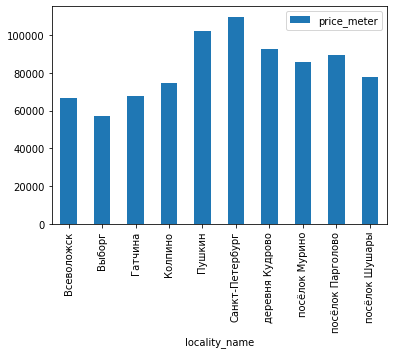

In [54]:
new.query('locality_name in @city').pivot_table(index='locality_name', values='price_meter').plot(kind='bar')

Мы видим, что больше всего объвялений в Санкт-Петербурге. Самая высокая стоимость жилья в Санкт-Петербурге, равна 109 тыс за кв.м. Самая низкая - в Выборге - 57 тыс за кв.м

Изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

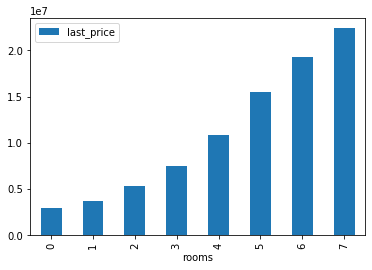

In [55]:
new.pivot_table(index='rooms', values='last_price').plot(kind='bar')

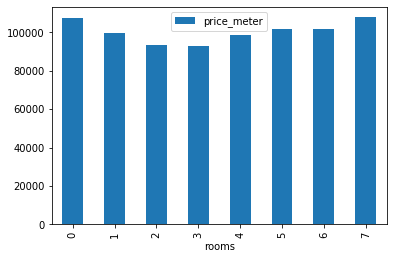

In [56]:
new.pivot_table(index='rooms', values='price_meter').plot(kind='bar')

Логично, что чем больше комнат, тем выше стоимость недвижимости. А вот стоимость 1 кв.метра в среднестатистических квартирах (до трех комнат) обратнопропорциональна количеству комнат: чем меньше комнат, тем выше стоимоть квадратного метра.

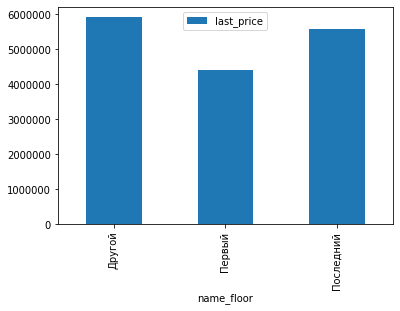

In [57]:
new.pivot_table(index='name_floor', values='last_price').plot(kind='bar')

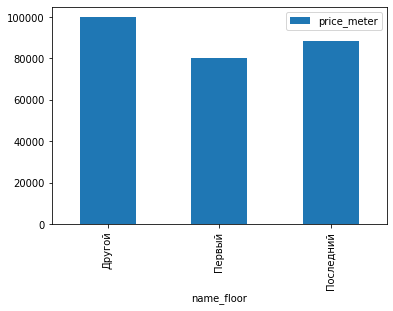

In [58]:
new.pivot_table(index='name_floor', values='price_meter').plot(kind='bar')

Квартиры, расположенные на первом и последнем этажах, дешевле, чем на все остальные квартиры. При этом квартиры на первом этаже стоят дешевле , чем на по последнем.

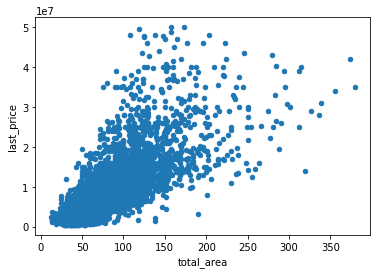

In [59]:
new.plot(x='total_area', y='last_price', kind='scatter')

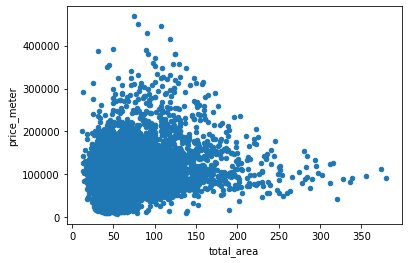

In [60]:
new.plot(x='total_area', y='price_meter', kind='scatter')

Аналогично числу комнат, чем выше площадь, тем выше стоимость квартиры. При этом стоимость квадратного метра обратно пропорциональна площади. Чем больше площадь, тем меньше стоит 1 кв.м

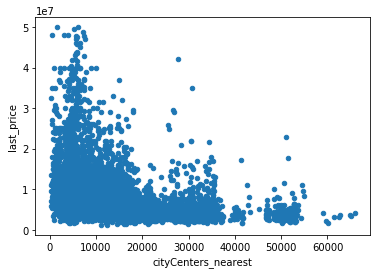

In [61]:
new.plot(x='cityCenters_nearest', y='last_price', kind='scatter')

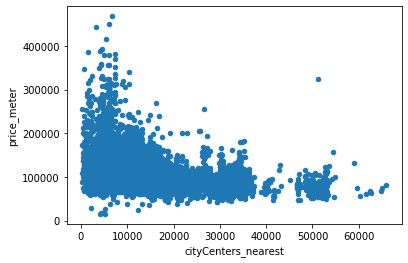

In [62]:
new.plot(x='cityCenters_nearest', y='price_meter', kind='scatter')

Чем дальше от центра, тем дешевле. 

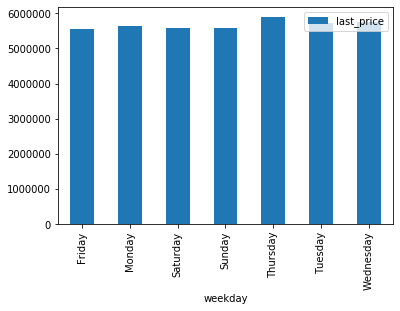

In [63]:
new.pivot_table(index='weekday', values='last_price').plot(kind='bar')

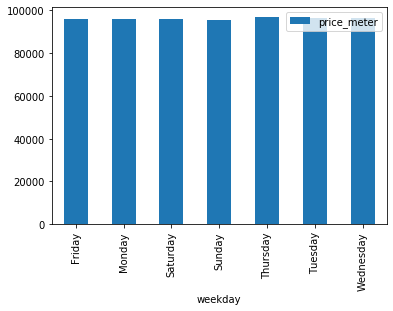

In [64]:
new.pivot_table(index='weekday', values='price_meter').plot(kind='bar')

Ярко выраженной зависимости цены от дня недели нет.

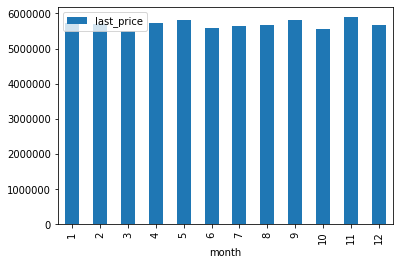

In [65]:
new.pivot_table(index='month', values='last_price').plot(kind='bar')

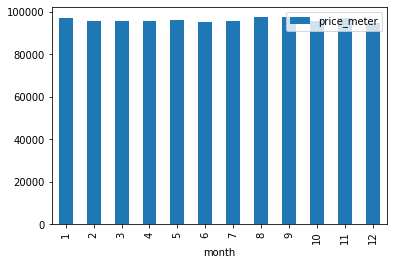

In [66]:
new.pivot_table(index='month', values='price_meter').plot(kind='bar')

Цена недвижимости примерно на одном уровне, не зависит от месяца. 

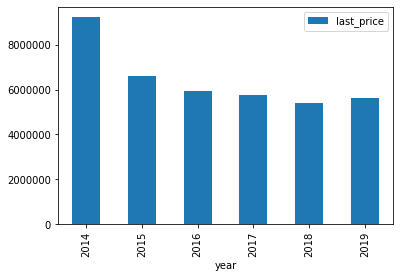

In [67]:
new.pivot_table(index='year', values='last_price').plot(kind='bar')

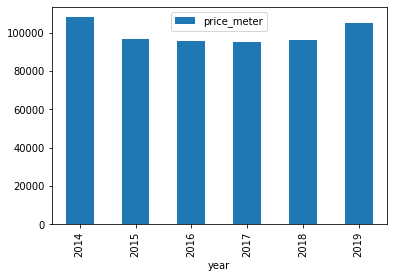

In [68]:
new.pivot_table(index='year', values='price_meter').plot(kind='bar')

In [69]:
new.pivot_table(index='year', values=['last_price', 'total_area'], aggfunc=['count', 'mean'])

count                     mean           
     last_price total_area    last_price total_area
year                                               
2014         99         99  9.208948e+06  79.391515
2015       1063       1063  6.603099e+06  65.986068
2016       2691       2691  5.953300e+06  59.858670
2017       7864       7864  5.753662e+06  58.320837
2018       7536       7536  5.381657e+06  54.874847
2019       1076       1076  5.613020e+06  53.001264

На графике цена за объект недвижимости кажется, что цена с 2015 по 2018 год падает, а в 2019 возрастает. Но на графике стоимости на квадртный метр видно, что стоимость с каждым годом все выше. 
В 2014 году мало объектов для продажи, чтобы сравнивать с другими годами, тем более общая площадь объектов в выборке значительно выше. 
Объяснить график зависимости стоимости объекта недвижимости от года можно с помощью сводной таблице с пощадями. Мы видим, что в 2018 году средняя общая площадь меньше, чем в предыдущих годах. А чем меньше площадь , тем меньше стоимость квартиры. В 2019 недвижимость подорожала.

In [89]:

new.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year
total_images,1.000000,0.141404,0.103130,0.083837,0.035380,0.009301,0.086941,0.029375,-0.028470,-0.023324,...,0.000181,-0.041728,0.016644,-0.004673,-0.018123,0.000117,-0.027138,0.134630,0.022485,0.120496
last_price,0.141404,1.000000,0.782301,0.500124,0.422784,0.043479,0.686169,0.056076,-0.048686,-0.025003,...,-0.037347,-0.329318,0.191125,0.012650,0.197005,-0.101607,0.120053,0.683001,0.006786,-0.071388
total_area,0.103130,0.782301,1.000000,0.783603,0.392352,-0.061856,0.935834,-0.028811,-0.087110,-0.052002,...,-0.028202,-0.222315,0.141634,-0.009002,0.149582,-0.073219,0.147426,0.171934,0.007127,-0.110341
rooms,0.083837,0.500124,0.783603,1.000000,0.212243,-0.229053,0.854831,-0.161556,-0.157923,-0.097513,...,-0.056649,-0.167058,0.118057,-0.049980,0.076475,-0.038217,0.118230,-0.046223,0.000438,-0.090577
ceiling_height,0.035380,0.422784,0.392352,0.212243,1.000000,-0.059672,0.352939,-0.029992,0.019491,0.006549,...,-0.094221,-0.301743,0.214660,-0.032609,0.196928,-0.117234,0.102753,0.297721,-0.001589,-0.102817
floors_total,0.009301,0.043479,-0.061856,-0.229053,-0.059672,1.000000,-0.161590,0.677342,0.070731,0.053379,...,0.106090,0.007292,-0.249431,0.101925,-0.119373,0.032177,-0.049009,0.226399,0.008636,0.027822
living_area,0.086941,0.686169,0.935834,0.854831,0.352939,-0.161590,1.000000,-0.104253,-0.063735,-0.036138,...,-0.051628,-0.216408,0.155445,-0.041075,0.130330,-0.056441,0.138015,0.086944,0.003440,-0.103971
floor,0.029375,0.056076,-0.028811,-0.161556,-0.029992,0.677342,-0.104253,1.000000,0.036822,0.037293,...,0.070783,0.003096,-0.161948,0.081028,-0.074700,0.016713,-0.038471,0.180759,0.016534,0.016809
studio,-0.028470,-0.048686,-0.087110,-0.157923,0.019491,0.070731,-0.063735,0.036822,1.000000,-0.004666,...,-0.023697,-0.010103,-0.030640,0.008910,0.002723,0.005969,-0.022013,0.028834,0.000861,0.019368
open_plan,-0.023324,-0.025003,-0.052002,-0.097513,0.006549,0.053379,-0.036138,0.037293,-0.004666,1.000000,...,-0.014565,-0.004394,-0.010631,0.009025,0.010014,-0.005278,-0.024020,0.015660,0.024901,-0.017020


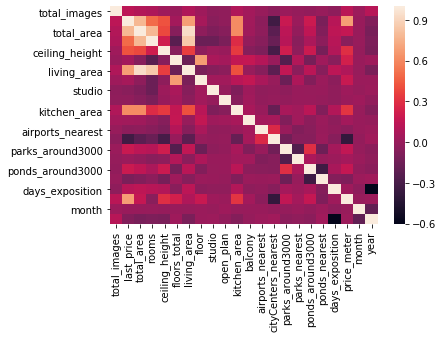

In [93]:
#посмотрим как коррелирует параметры между собой в таблице без выбросов. 
sns.heatmap(new.corr())

In [94]:
new.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year
total_images,1.000000,0.141404,0.103130,0.083837,0.035380,0.009301,0.086941,0.029375,-0.028470,-0.023324,...,0.000181,-0.041728,0.016644,-0.004673,-0.018123,0.000117,-0.027138,0.134630,0.022485,0.120496
last_price,0.141404,1.000000,0.782301,0.500124,0.422784,0.043479,0.686169,0.056076,-0.048686,-0.025003,...,-0.037347,-0.329318,0.191125,0.012650,0.197005,-0.101607,0.120053,0.683001,0.006786,-0.071388
total_area,0.103130,0.782301,1.000000,0.783603,0.392352,-0.061856,0.935834,-0.028811,-0.087110,-0.052002,...,-0.028202,-0.222315,0.141634,-0.009002,0.149582,-0.073219,0.147426,0.171934,0.007127,-0.110341
rooms,0.083837,0.500124,0.783603,1.000000,0.212243,-0.229053,0.854831,-0.161556,-0.157923,-0.097513,...,-0.056649,-0.167058,0.118057,-0.049980,0.076475,-0.038217,0.118230,-0.046223,0.000438,-0.090577
ceiling_height,0.035380,0.422784,0.392352,0.212243,1.000000,-0.059672,0.352939,-0.029992,0.019491,0.006549,...,-0.094221,-0.301743,0.214660,-0.032609,0.196928,-0.117234,0.102753,0.297721,-0.001589,-0.102817
floors_total,0.009301,0.043479,-0.061856,-0.229053,-0.059672,1.000000,-0.161590,0.677342,0.070731,0.053379,...,0.106090,0.007292,-0.249431,0.101925,-0.119373,0.032177,-0.049009,0.226399,0.008636,0.027822
living_area,0.086941,0.686169,0.935834,0.854831,0.352939,-0.161590,1.000000,-0.104253,-0.063735,-0.036138,...,-0.051628,-0.216408,0.155445,-0.041075,0.130330,-0.056441,0.138015,0.086944,0.003440,-0.103971
floor,0.029375,0.056076,-0.028811,-0.161556,-0.029992,0.677342,-0.104253,1.000000,0.036822,0.037293,...,0.070783,0.003096,-0.161948,0.081028,-0.074700,0.016713,-0.038471,0.180759,0.016534,0.016809
studio,-0.028470,-0.048686,-0.087110,-0.157923,0.019491,0.070731,-0.063735,0.036822,1.000000,-0.004666,...,-0.023697,-0.010103,-0.030640,0.008910,0.002723,0.005969,-0.022013,0.028834,0.000861,0.019368
open_plan,-0.023324,-0.025003,-0.052002,-0.097513,0.006549,0.053379,-0.036138,0.037293,-0.004666,1.000000,...,-0.014565,-0.004394,-0.010631,0.009025,0.010014,-0.005278,-0.024020,0.015660,0.024901,-0.017020


Цена продажи выше всего коррелирует с общей площадью. 
Общая площадь выше всего коррелирует  с жилой площадью. 
Количеством комнат выше всего коррелирует с жилой площадью.
Цена квадратного метра с ценой продажи.
Других ярко выделенных корреляций нет. 

Изучим предложения квартир в Санкт-Петербурге. Выясним, какая область входит в центр.  

In [71]:
spb = new.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

In [72]:
spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13465 entries, 0 to 13464
Data columns (total 29 columns):
total_images            13465 non-null int64
last_price              13465 non-null int64
total_area              13465 non-null float64
first_day_exposition    13465 non-null datetime64[ns]
rooms                   13465 non-null int64
ceiling_height          8287 non-null float64
floors_total            13404 non-null float64
living_area             13465 non-null float64
floor                   13465 non-null int64
is_apartment            13465 non-null object
studio                  13465 non-null bool
open_plan               13465 non-null bool
kitchen_area            13465 non-null float64
balcony                 13465 non-null int64
locality_name           13465 non-null object
airports_nearest        13421 non-null float64
cityCenters_nearest     13441 non-null float64
parks_around3000        13441 non-null float64
parks_nearest           6091 non-null float64
ponds_aroun

In [73]:
spb[spb['cityCenters_nearest'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor
391,7,37000000,161.00,2016-05-22,3,NaN,9.0,84.000000,8,0,...,NaN,NaN,402.0,229813,5,2016,Sunday,0.52,0.17,Другой
749,12,18500000,66.00,2017-06-08,1,3.00,7.0,25.000000,7,0,...,NaN,NaN,130.0,280303,6,2017,Thursday,0.38,0.53,Последний
1039,13,3100000,32.00,2019-03-15,1,NaN,4.0,19.000000,2,False,...,NaN,NaN,3.0,96875,3,2019,Friday,0.59,0.16,Другой
1054,12,9500000,130.00,2019-03-27,5,NaN,5.0,90.000000,2,0,...,NaN,NaN,15.0,73076,3,2019,Wednesday,0.69,0.12,Другой
3095,15,5600000,68.00,2018-08-24,3,2.57,9.0,42.900000,1,0,...,NaN,NaN,181.0,82352,8,2018,Friday,0.63,0.15,Первый
4330,11,6500000,50.77,2018-12-18,2,2.75,12.0,27.400000,3,0,...,NaN,NaN,60.0,128028,12,2018,Tuesday,0.54,0.22,Другой
5816,15,22100000,89.10,2017-06-11,2,NaN,10.0,50.596317,6,0,...,NaN,NaN,403.0,248035,6,2017,Sunday,0.57,0.17,Другой
6206,19,7099000,52.00,2018-11-04,2,NaN,7.0,33.000000,2,0,...,NaN,NaN,102.0,136519,11,2018,Sunday,0.63,0.14,Другой
6377,10,6000000,64.20,2018-11-26,2,3.20,4.0,31.400000,3,0,...,NaN,NaN,100.0,93457,11,2018,Monday,0.49,0.27,Другой
6714,4,3730000,33.90,2019-02-20,1,NaN,24.0,14.600000,18,0,...,NaN,NaN,20.0,110029,2,2019,Wednesday,0.43,0.28,Другой


In [74]:
#в 24 сторках отсутствует информация о расстоянии до центра, удалим их из таблицы, т.к. их значение крайне мало.
spb = spb.dropna(subset=['cityCenters_nearest'])

In [75]:
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor
0,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,0,...,2.0,574.0,558.0,92785,8,2015,Thursday,0.61,0.15,Другой
1,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,1.0,48.0,121.0,100000,6,2018,Tuesday,0.32,0.41,Другой
2,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,0,...,0.0,NaN,289.0,88524,2,2017,Sunday,0.71,0.11,Другой
3,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.300000,3,0,...,2.0,553.0,137.0,127525,11,2017,Thursday,0.51,0.21,Другой
4,16,4650000,39.00,2017-11-18,1,NaN,14.0,20.500000,5,0,...,1.0,296.0,19.0,119230,11,2017,Saturday,0.53,0.19,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13460,19,9200000,101.00,2019-04-01,3,3.05,15.0,63.000000,12,0,...,0.0,NaN,23.0,91089,4,2019,Monday,0.62,0.15,Другой
13461,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.300000,4,0,...,2.0,652.0,29.0,100566,2,2018,Wednesday,0.46,0.26,Другой
13462,3,5500000,52.00,2018-07-19,2,NaN,5.0,31.000000,2,0,...,0.0,NaN,15.0,105769,7,2018,Thursday,0.60,0.12,Другой
13463,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.300000,7,0,...,1.0,806.0,519.0,129903,10,2016,Thursday,0.55,0.15,Другой


In [76]:
spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13441 entries, 0 to 13464
Data columns (total 29 columns):
total_images            13441 non-null int64
last_price              13441 non-null int64
total_area              13441 non-null float64
first_day_exposition    13441 non-null datetime64[ns]
rooms                   13441 non-null int64
ceiling_height          8276 non-null float64
floors_total            13380 non-null float64
living_area             13441 non-null float64
floor                   13441 non-null int64
is_apartment            13441 non-null object
studio                  13441 non-null bool
open_plan               13441 non-null bool
kitchen_area            13441 non-null float64
balcony                 13441 non-null int64
locality_name           13441 non-null object
airports_nearest        13421 non-null float64
cityCenters_nearest     13441 non-null float64
parks_around3000        13441 non-null float64
parks_nearest           6091 non-null float64
ponds_aroun

In [77]:
#Создадим столбец с расстоянием до центра в километрах,округлим до целых значений.
spb['centre'] = (spb['cityCenters_nearest'] / 1000).astype('int')

In [78]:
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor,centre
0,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,574.0,558.0,92785,8,2015,Thursday,0.61,0.15,Другой,13
1,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,48.0,121.0,100000,6,2018,Tuesday,0.32,0.41,Другой,8
2,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,0,...,NaN,289.0,88524,2,2017,Sunday,0.71,0.11,Другой,15
3,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,0,...,553.0,137.0,127525,11,2017,Thursday,0.51,0.21,Другой,13
4,16,4650000,39.0,2017-11-18,1,NaN,14.0,20.5,5,0,...,296.0,19.0,119230,11,2017,Saturday,0.53,0.19,Другой,14


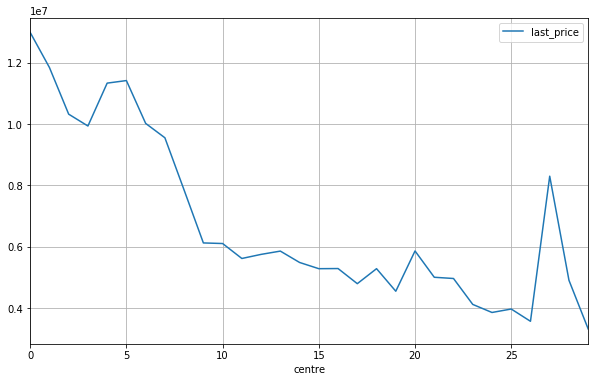

In [80]:
#Постром график, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
spb.pivot_table(index='centre', values='last_price').plot(figsize=(10,6), grid=True)

Цена недвижимости начинает сильно падать вниз после 5 км. Делаем вывод, что центральная зона радиусом 5 км.

In [95]:
spb_centre = spb.query('centre <= 5 ')

In [96]:
spb_centre

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,month,year,weekday,living_total_ratio,kitchen_total_ratio,name_floor,centre
11,8,6500000,97.2,2015-10-31,2,NaN,3.0,46.5,1,0,...,124.0,265.0,66872,10,2015,Saturday,0.48,0.20,Первый,2
19,6,15500000,149.0,2017-06-26,5,NaN,5.0,104.0,4,0,...,779.0,644.0,104026,6,2017,Monday,0.70,0.11,Другой,3
31,18,7990000,74.0,2017-08-24,2,NaN,4.0,43.0,4,0,...,NaN,609.0,107972,8,2017,Thursday,0.58,0.27,Последний,4
32,2,20000000,118.0,2018-09-11,3,3.00,9.0,68.0,7,0,...,779.0,37.0,169491,9,2018,Tuesday,0.58,0.14,Другой,4
45,32,9600000,90.0,2017-09-26,4,NaN,5.0,67.0,2,0,...,NaN,104.0,106666,9,2017,Tuesday,0.74,0.09,Другой,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,7,4990000,62.5,2018-04-26,2,2.70,4.0,32.3,4,0,...,171.0,166.0,79840,4,2018,Thursday,0.52,0.19,Последний,4
13441,14,10100000,78.0,2017-05-12,3,3.27,5.0,48.6,5,0,...,117.0,621.0,129487,5,2017,Friday,0.62,0.11,Последний,1
13449,5,9000000,110.0,2015-12-10,4,3.36,7.0,64.6,5,0,...,118.0,816.0,81818,12,2015,Thursday,0.59,0.14,Другой,5
13450,11,4250000,47.0,2016-05-20,1,NaN,6.0,18.2,1,False,...,519.0,131.0,90425,5,2016,Friday,0.39,0.31,Первый,4


In [97]:
#создадим датафрейм с интересующими нас столбцами
spb_centre_2 = spb_centre.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition', 'price_meter']]

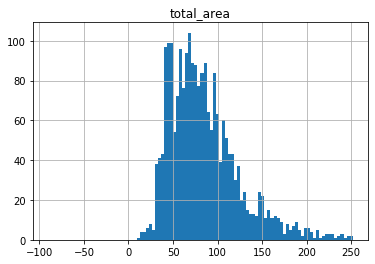

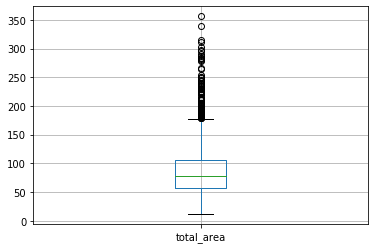

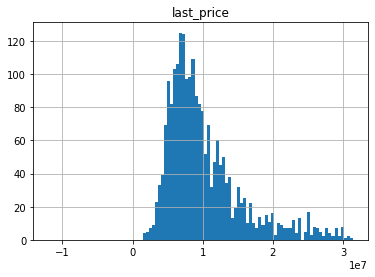

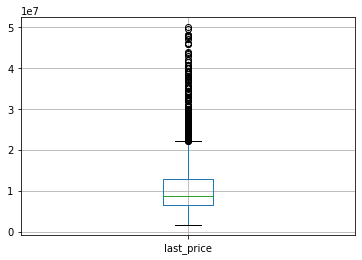

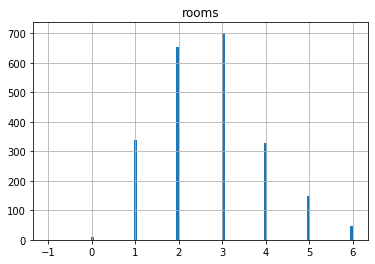

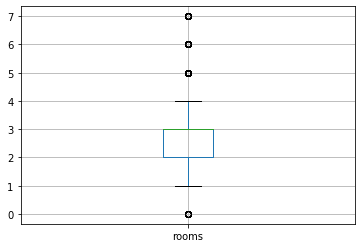

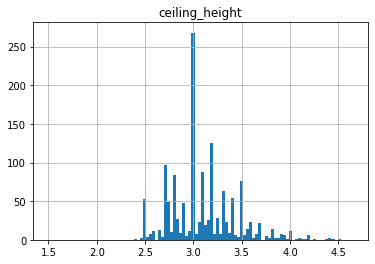

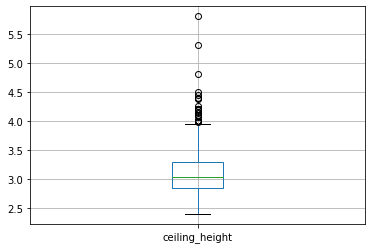

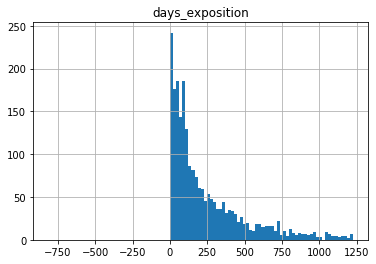

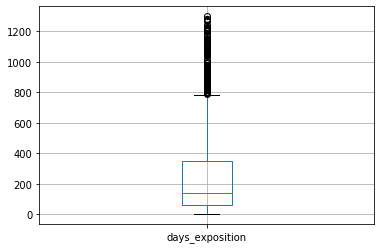

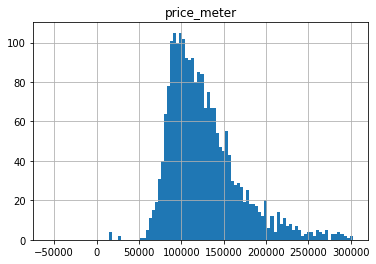

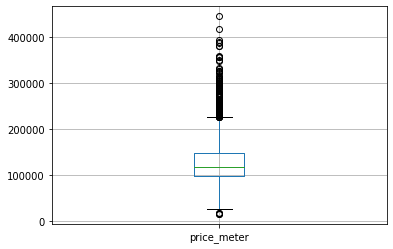

In [98]:
#как и ранее с помощью цикла построим графики
for column in spb_centre_2:
    q1 = spb_centre_2[column].quantile(.25)
    q3 = spb_centre_2[column].quantile(.75)
    iqr = q3 - q1
    spb_centre_2.hist(column, bins=100, range=((q1-3*iqr), (q3+3*iqr)))
    plt.show()
    spb_centre_2.boxplot(column)

В центре Санкт-Петербурга наиболее часто продают квартиры общей площадью 40-50 кв.метров, чуть реже 60-70 кв.м и 90 кв.м. Эти числовые данные соответствуют типовым 2-х и 3-х комнатным квартирам, что и подтверждает гистограмма с комнатами. Чаще всего потолки 3.0 метра, довольно много квартир с потолками 3.2 метра. Потолки 2.5 метра встретишь не часто. Средняя цена квартир 5-8 млн, цена квадратного метра 90-100 тыс. Время продажи такое же , как  и в целом по всему городу и области. Медиана - 95 дней. Пики аналогично через 45, 60 и 90 дней

In [99]:
spb_centre_3 = spb_centre.loc[:, ['rooms', 'name_floor', 'last_price', 'centre','weekday', 'month', 'year', 'price_meter']]

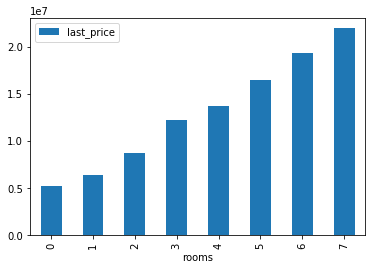

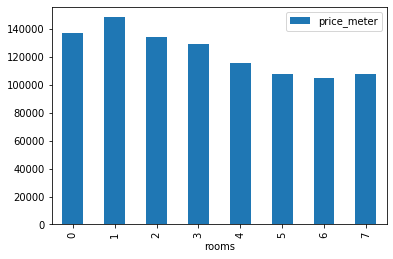

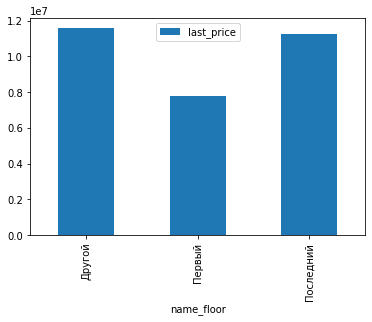

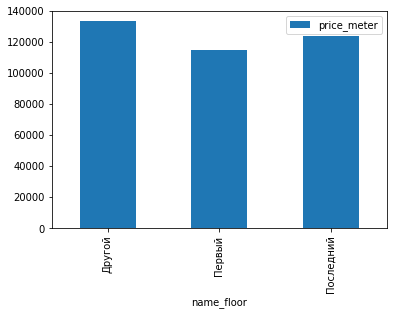

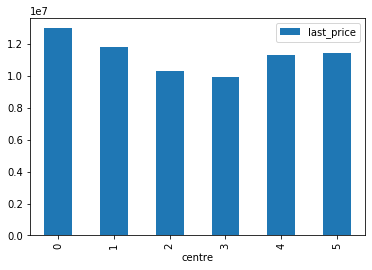

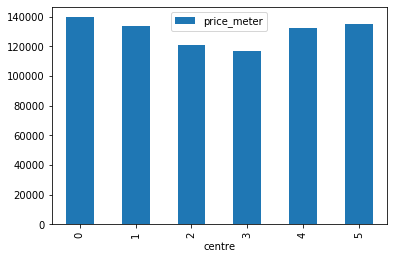

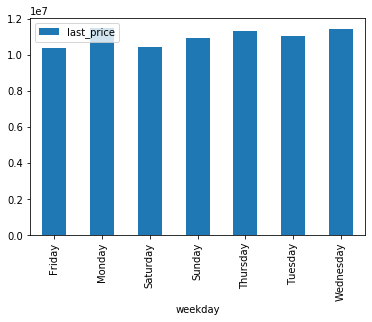

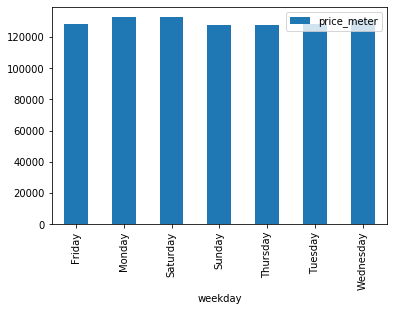

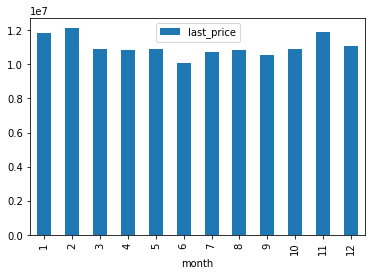

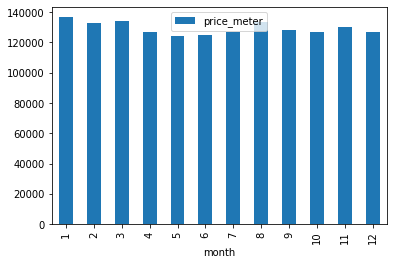

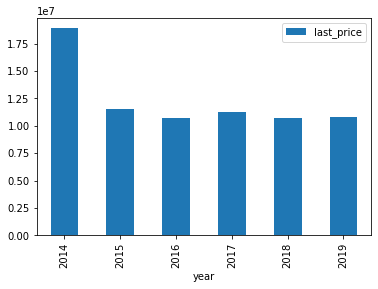

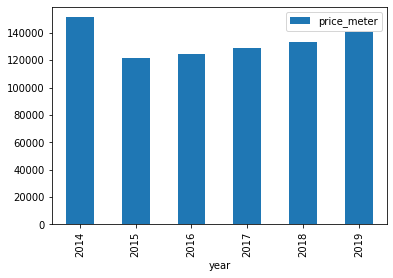

In [100]:
for column in spb_centre_3:
    if (column != 'last_price') and (column != 'price_meter'):
        spb_centre_3.pivot_table(index=column, values='last_price').plot(kind='bar')
        plt.show()
        spb_centre_3.pivot_table(index=column, values='price_meter').plot(kind='bar')
        plt.show()    

Чем больше комнат, тем выше стоимость жилья, это логично. Но если посмотреть стоимость 1 кв.метра - обратная зависимость. При этом цена 1 кв.метра в 1-комнатной квартире в центре чуть выше, чем в студии.  
Дешевле всего квартиры на первом этаже, чуть дороже на последнем. Самые дорогие располагаются не на крайних этажах.
С каждым годом стоимость 1 кв.метра становится выше. 

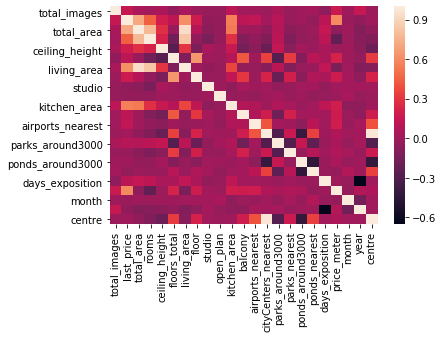

In [102]:
sns.heatmap(spb_centre.corr())

In [103]:
spb_centre.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,month,year,centre
total_images,1.000000,0.155414,0.048208,0.020297,0.043103,-0.046435,0.033664,-0.008784,-0.025937,-0.026274,...,-0.009841,0.051763,-0.021975,-0.001887,0.020726,-0.056472,0.163121,-0.003924,0.150552,-0.010511
last_price,0.155414,1.000000,0.720227,0.449727,0.196529,0.119049,0.618555,0.175477,-0.049024,-0.031727,...,0.017431,0.093896,-0.018620,0.007433,-0.042623,0.108363,0.595050,-0.015728,-0.044436,0.006648
total_area,0.048208,0.720227,1.000000,0.783437,0.284467,-0.014723,0.939882,0.087032,-0.070091,-0.035680,...,-0.044949,0.081894,-0.064221,-0.037237,-0.009847,0.144779,-0.056150,-0.004794,-0.105676,-0.049144
rooms,0.020297,0.449727,0.783437,1.000000,0.224778,-0.175458,0.834899,-0.048208,-0.139179,-0.033713,...,-0.111035,0.109348,-0.116491,-0.042886,-0.023907,0.118654,-0.232339,-0.006581,-0.082841,-0.114205
ceiling_height,0.043103,0.196529,0.284467,0.224778,1.000000,-0.266085,0.300533,-0.137095,0.039291,0.007302,...,-0.204892,0.141168,-0.078735,0.023631,-0.012262,0.051643,-0.010725,0.002286,-0.069748,-0.197335
floors_total,-0.046435,0.119049,-0.014723,-0.175458,-0.266085,1.000000,-0.115443,0.650242,-0.004307,-0.005648,...,0.338315,-0.281597,0.325657,-0.096427,0.101053,0.047340,0.221446,0.003661,-0.041657,0.326702
living_area,0.033664,0.618555,0.939882,0.834899,0.300533,-0.115443,1.000000,0.004161,-0.050009,-0.020981,...,-0.086190,0.108537,-0.102300,-0.024828,-0.013758,0.131399,-0.128658,0.008468,-0.099807,-0.092273
floor,-0.008784,0.175477,0.087032,-0.048208,-0.137095,0.650242,0.004161,1.000000,-0.025499,-0.018372,...,0.223352,-0.204273,0.206004,-0.082751,0.063247,0.042621,0.175896,0.025883,-0.052539,0.219049
studio,-0.025937,-0.049024,-0.070091,-0.139179,0.039291,-0.004307,-0.050009,-0.025499,1.000000,-0.002820,...,0.009780,-0.042103,-0.022550,0.012764,0.021620,-0.039633,0.012029,0.016133,0.019605,0.008573
open_plan,-0.026274,-0.031727,-0.035680,-0.033713,0.007302,-0.005648,-0.020981,-0.018372,-0.002820,1.000000,...,-0.005058,0.022052,-0.025009,-0.001587,-0.041343,-0.024603,-0.010397,0.034644,-0.030893,-0.008679


Корреляции аналогичны тем, что мы делали для всей таблицы.

Построим графики для центра и всего города на одном рисунке.

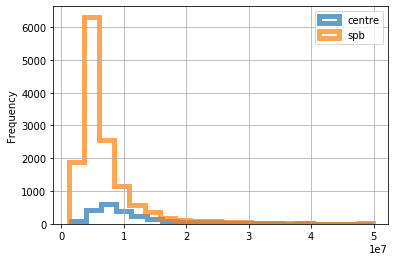

In [116]:
ax = spb_centre.plot(kind='hist', y='last_price', histtype='step', bins=20, linewidth=5, alpha=0.7, label='centre') 
spb.plot(kind='hist', y='last_price', histtype='step', bins=20, linewidth=5, alpha=0.7, label='spb', ax=ax, grid=True, legend=True)

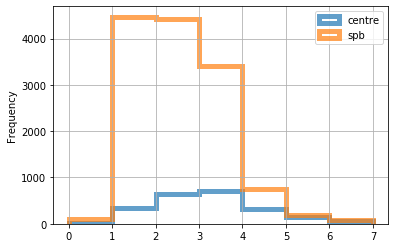

In [119]:
ax = spb_centre.plot(kind='hist', y='rooms', histtype='step', bins=7, linewidth=5, alpha=0.7, label='centre') 
spb.plot(kind='hist', y='rooms', histtype='step', bins=7, linewidth=5, alpha=0.7, label='spb', ax=ax, grid=True, legend=True)

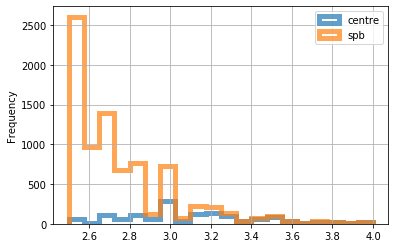

In [124]:
ax = spb_centre.plot(kind='hist', y='ceiling_height', histtype='step', range=(2.5,4), bins=20, linewidth=5, alpha=0.7, label='centre') 
spb.plot(kind='hist', y='ceiling_height', histtype='step', range=(2.5,4), bins=20, linewidth=5, alpha=0.7, label='spb', ax=ax, grid=True, legend=True)

Пик графика цены продажи квартир в центре смещен вправо, то есть квартиры в центре стоят дороже. 

Если во всем городе чаще всего продают 1-2 комнатные квартиры, то в центре 2-3 комнатные. При этом от 5-ти комнат и выше графики почти совпадают. Видимо, большинство таких квартир находится в центре.

По высоте потолка также наглядно показано, что во всем городе преобладает высота 2.5 метра, тогда как в центре 3.0 метра. После отметки 3.2 графики почти совпадают, это говорит о том, что квартиры с такими потолками расположены именно в центре.

### Шаг 5. Общий вывод

По всему региону чаще всего продаются 1-2 комнатные квартиры с высотой потолка 2.5 метра, общей площадью около 40 кв.метров. Цена таких квартир 3-4 млн руб, стоимость 1 кв.м около 100 тыс.  
Больше всего объявлений в Санкт-Петербурге. Самая высокая стоимость жилья в Санкт-Петербурге, равна 109 тыс за кв.м. Самая низкая - в Выборге - 57 тыс за кв.м.  
При этом чем выше площадь квартиры, тем ниже стоимость 1 кв.метра.  
Половина сделок закрывается за 3 месяца, 75% сделок - за 8 месяцев. Поэтому все , что дольше 8 месяцев можно назвать довольно долгой продажей. 25% сделок закрывается за 45 дней, поэтому все, что быстрее этого срока отнесем к быстрой продаже. 
На графиках времени продажи есть большие пики через 45 дней, 60 и 90 дней с момента публикации объявления. Возможно, это срок бесплатной публикации в сервисе, после чего пользователи не стали продлять сервис. Эти данные требуют уточнения.  
Квартиры, расположенные на первом и последнем этажах стоят дешевле. При этом квартиры на первом этаже самые дешевые.  
С каждым годом стоимость 1 кв.метра растет.

Чем дальше от центра, чем ниже стоимость квартир. 
По графику зависимости удаленности от центра от стоимости виден резкий спад цены после 5-ти км. Этим значением мы ограничили центр. И рассмотрели аналогичные показатели для центра Санкт-Петербурга

По центральной части Санкт-Петербурга чаще всего продаются 2-х и 3-х комнтаные квартиры с высотой потолка 3,0-3,2 метра, общей площадью около 40 кв.м, около 70 кв.м и около 90 кв.м. Средняя цена квартир 5-8 млн, цена квадратного метра 90-100 тыс. Время продажи такое же , как и в целом по всему городу и области. Медиана - 95 дней. Пики аналогично через 45, 60 и 90 дней.
Остальные зависимости аналогичны, как и по всему региону. 

В процессе работы выявили "выбросы", которые искажали общие данные, поэтому избавились от них.
Условия для объектов недвижимости, по которым проводили анализ:

- общая площадь не более 400 кв.меторв
- Число комнат меньше 8  
- Цена за квадратный метр не больше 500 тыс  
- Цена продажи от 400 тыс до 50 млн  
- количество дней - от 1 до 1300